In [66]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('float_format', '{:f}'.format)

In [67]:
# Load the project_financing_estimates table
full_data = pd.read_csv("C:/Users/Acer/Downloads/retrolux data/project_financing_estimates.csv")

In [28]:
full_data.columns

Index(['id', 'project_id', 'buyer_id', 'financier_id', 'status',
       'industry_type', 'client_name', 'current_annual_energy_cost',
       'annual_project_savings', 'upfront_project_cost', 'annual_service_cost',
       'transaction_fee', 'service_term', 'credit_worthiness',
       'deferment_time', 'contractor_payment', 'financier_markup',
       'maintenance_revenue', 'monthly_revenue', 'total_markup_percentage',
       'financed_amount', 'financier_revenue', 'utility_payment',
       'finance_payment', 'client_payment', 'monthly_net_savings',
       'cash_flow_neg_adjust', 'notes', 'created_at', 'updated_at',
       'annual_service_cost_modifier_percentage', 'client_phone',
       'buyer_company_name', 'client_email', 'interest_rate_percentage',
       'cumulative_apr_differential', 'active', 'proposal_id',
       'client_company_name', 'estimate_name', 'inactive_at',
       'created_by_user_id', 'inactivated_by_user_id', 'annual_energy_usage',
       'annual_energy_savings', 'view

In [29]:
# Important columns are these one
data = full_data[['id','project_id','current_annual_energy_cost','annual_project_savings','upfront_project_cost','annual_energy_usage','annual_energy_savings']]
data

,id,project_id,current_annual_energy_cost,annual_project_savings,upfront_project_cost,annual_energy_usage,annual_energy_savings
0,118,nan,17125.000000,12844.000000,20400.000000,nan,nan
1,6,nan,10000.000000,100.000000,250.000000,nan,nan
2,53,nan,55000.000000,25242.000000,84200.000000,nan,385150.000000
3,238,2407.000000,44259.000000,28446.000000,85786.000000,498412.000000,320339.000000
4,11,nan,127657.000000,75676.310000,431260.290000,1930117.000000,1332001.000000
...,...,...,...,...,...,...,...
1863,2148,12034.000000,68973.000000,60941.000000,80900.000000,450061.000000,383123.000000
1864,2149,12035.000000,58508.000000,51208.000000,59838.520000,381855.000000,321021.000000
1865,2150,11941.000000,38202.000000,18916.000000,43058.000000,223715.000000,106830.000000
1866,2151,11941.000000,38202.000000,18916.000000,43058.000000,223715.000000,106830.000000


In [55]:
# Hypothesis: ROI = annual_project_savings / upfront_project_cost (check with Brian/Leif)
# Estimate ROI 
roi = data['annual_project_savings']/data['upfront_project_cost']
roi.describe()

count   1868.000000
mean       0.461584
std        0.414497
min        0.000000
25%        0.279659
50%        0.373994
75%        0.532964
max        5.555445
dtype: float64

Text(0.5, 1.0, 'ROI projects histogram')

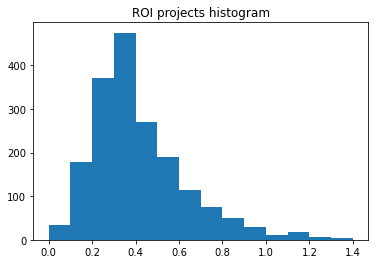

In [56]:
# Little histogram on the ROI
plt.hist(roi, bins = [i/10 for i in range(15)])
plt.title("ROI projects histogram")

In [57]:
# Describe current annual energy cost (check units, is this USD?)
data['current_annual_energy_cost'].describe()

count       1868.000000
mean      133984.451907
std      1394062.855126
min            0.000000
25%        14929.000000
50%        32966.500000
75%        69868.000000
max     30000900.000000
Name: current_annual_energy_cost, dtype: float64

Text(0.5, 1.0, "Project's current annual energy cost histogram")

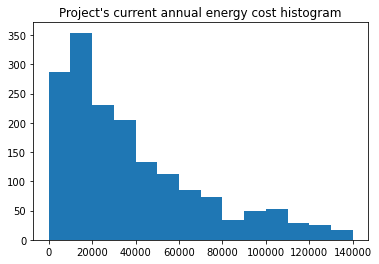

In [58]:
# Little histogram on the current_annual_energy_cost
plt.hist(data['current_annual_energy_cost'], bins = [10000*i for i in range(15)])
plt.title("Project's current annual energy cost histogram")

In [79]:
# Regarding the energy savings, let's compute the savings in percentage
energy_savings_percentage = data['annual_energy_savings']/data['annual_energy_usage']
energy_savings_percentage.describe()

count   1676.000000
mean            inf
std             nan
min        0.017933
25%        0.551010
50%        0.629012
75%        0.714211
max             inf
dtype: float64

Text(0.5, 1.0, 'Energy savings [%] of projects')

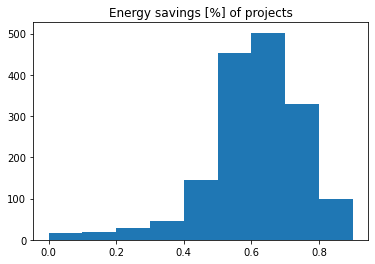

In [80]:
# Little histogram on the energy savings percentage
plt.hist(energy_savings_percentage, bins = [i/10 for i in range(10)])
plt.title("Energy savings [%] of projects")